# load graphml and xlsx data

In [1]:
import pandas as pd
import sys
from flowmater.graph_util import draw_graph
from flowmater.ExperimentManager import ExperimentManager

In [7]:
#init class
em=ExperimentManager()

#load databases
em.load_experiments("example_database/db1")
em.load_experiments("example_database/db2")

#process
em.classify_experiments()

In [8]:
#show
df=pd.DataFrame.from_dict(em.database).T
df

,Chemical_A,Chemical_B,Chemical_C,"Measure_thickness, Electrolyte thickness, um","Proc_1st_heat, Heat, oC","Proc_take_material, Take, mg","Proc_make_cell, Make cell, kN","Proc_anneal_before_meas, Wait, hours","Measure_EIS, AC conductivity, S/cm","Proc_meas_temp, Heat, oC",graphID,Chemical_E,"Proc_pre_heat, Heat, oC"
example_database/db1\chart_0,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.01,25,1,NaN,NaN
example_database/db1\chart_1,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.03,50,1,NaN,NaN
example_database/db1\chart_2,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.05,70,1,NaN,NaN
example_database/db1\chart_3,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.07,80,1,NaN,NaN
example_database/db1\chart_4,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.1,100,1,NaN,NaN
example_database/db1\chart2_0,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.3,25,1,NaN,NaN
example_database/db1\chart2_1,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,12,80,1,NaN,NaN
example_database/db1\chart2_2,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,10,100,1,NaN,NaN
example_database/db1\chart3_0,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.3,25,0,ClC(Cl)(Cl)C,NaN
example_database/db1\chart3_1,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,12,80,0,ClC(Cl)(Cl)C,NaN


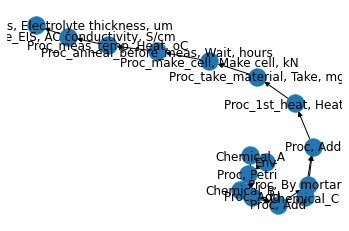

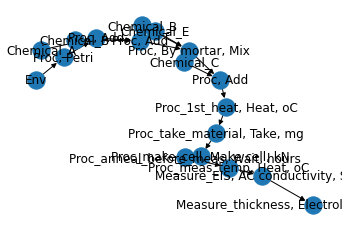

In [9]:
#show flowcharts
draw_graph(em.graph_list[0])
draw_graph(em.graph_list[2])

In [10]:
#calcualte fingerprint of florcharts
from flowmater.FlowchartFP import FlowchartFP
FFP=FlowchartFP(em.graph_list)
graph_fp_dict={num:FFP(g) for num,g in enumerate(em.graph_list)}

In [11]:
#merge dataframe
fp_df=pd.DataFrame.from_dict(graph_fp_dict).T
fp_df.columns=["FP_"+i for i in FFP.v_to_i.keys()]
merge_df=pd.merge(df,fp_df,left_on="graphID",right_index=True)
merge_df

,Chemical_A,Chemical_B,Chemical_C,"Measure_thickness, Electrolyte thickness, um","Proc_1st_heat, Heat, oC","Proc_take_material, Take, mg","Proc_make_cell, Make cell, kN","Proc_anneal_before_meas, Wait, hours","Measure_EIS, AC conductivity, S/cm","Proc_meas_temp, Heat, oC",...,"FP_Proc, Petri<-->Env--Proc, Add","FP_Proc, Add<-->Chemical_C--Proc, By mortar, Mix--Proc_1st_heat, Heat, oC","FP_Chemical_A<-->Proc, Add","FP_Chemical_E<-->Proc, By mortar, Mix","FP_Chemical_C<-->Proc, Add","FP_Proc, Add<-->Chemical_A--Proc, Add--Proc, Petri","FP_Proc, By mortar, Mix<-->Proc, Add--Proc, Add","FP_Env<-->Proc, Petri","FP_Proc, Add<-->Chemical_A--Proc, Petri--Proc_pre_heat, Heat, oC","FP_Proc_pre_heat, Heat, oC<-->Proc, Add--Proc, Add"
example_database/db1\chart_0,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.01,25,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart_1,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.03,50,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart_2,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.05,70,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart_3,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.07,80,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart_4,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.1,100,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart2_0,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.3,25,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart2_1,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,12,80,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart2_2,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,10,100,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart3_0,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,0.3,25,...,1,1,1,0,1,1,1,1,0,0
example_database/db1\chart3_1,CC(=O)C,ClC(Cl)(Cl)C,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,350,120,120,20,12,12,80,...,1,1,1,0,1,1,1,1,0,0


In [13]:
#simplify database (drop columns of duplicates)
simple_cols=[]
for col in merge_df.columns:
    if len(list(merge_df[col].drop_duplicates()))>1:
        simple_cols.append(col)
        
merge_df[simple_cols]

,"Measure_EIS, AC conductivity, S/cm","Proc_meas_temp, Heat, oC",graphID,Chemical_E,"Proc_pre_heat, Heat, oC","FP_Proc, By mortar, Mix<-->Chemical_B--Chemical_E--Proc, Add--Proc, Add","FP_Chemical_B<-->Proc, By mortar, Mix","FP_Chemical_E<-->Proc, By mortar, Mix","FP_Proc, By mortar, Mix<-->Proc, Add--Proc, Add"
example_database/db1\chart_0,0.01,25,1,NaN,NaN,0,0,0,1
example_database/db1\chart_1,0.03,50,1,NaN,NaN,0,0,0,1
example_database/db1\chart_2,0.05,70,1,NaN,NaN,0,0,0,1
example_database/db1\chart_3,0.07,80,1,NaN,NaN,0,0,0,1
example_database/db1\chart_4,0.1,100,1,NaN,NaN,0,0,0,1
example_database/db1\chart2_0,0.3,25,1,NaN,NaN,0,0,0,1
example_database/db1\chart2_1,12,80,1,NaN,NaN,0,0,0,1
example_database/db1\chart2_2,10,100,1,NaN,NaN,0,0,0,1
example_database/db1\chart3_0,0.3,25,0,ClC(Cl)(Cl)C,NaN,0,0,0,1
example_database/db1\chart3_1,12,80,0,ClC(Cl)(Cl)C,NaN,0,0,0,1
